## Problem Description

It is important to know if a patient will be readmitted in some hospital. The reason is that you can change the treatment, in order to avoid a readmission.

In this database, you have 3 different outputs:

- No readmission;
- A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate);
- A readmission in more than 30 days (this one is not so good as well the last one, however, the reason can be the state of the patient.

# Coding 

### 1. Import Libraries

In [388]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Read Data

In [389]:
df = pd.read_csv('diabetic_data.csv/diabetic_data.csv')

In [390]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 3. Data Analysis, Visualization and Cleaning

<b>Shape of the data ?</b>

In [391]:
print('The shape of the Dataset is :', df.shape, 'with', df.shape[0], 'records and', df.shape[1], 'columns')

The shape of the Dataset is : (101766, 50) with 101766 records and 50 columns


<b>Check the columns of the dataset?</b>

In [392]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

<b> Number of columns in the data?</b>

In [393]:
print('There are total', len(df.columns), 'columns in the dataset.')

There are total 50 columns in the dataset.


From the 50 columns 49 columns such as encounter_id, patient_nbr etc are the independent variables and the column name <b>"readmitted"</b> is the dependent variable and the label of the data. 

<b>Statistics of the Data ?</b>

In [394]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


<b> How many Null Values in Data? </b>

The data contains some null values, but null values are filled with "?". so we will look for '?' in each column for null values.

In [395]:
for i in df.columns:
    print(i, df[df[i] == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


We can see that there are many null values in the columns like "medical_specialty" , "race" and "payer_code". So we will have to fill these null values or drop the rows or columns with null values.  

We start analyzing columns sequentially and will drill down the data to look for insights. We will look for Number of Patients in the data. AS we know we can check from the <b>"patient_nbr"</b> column that how many unique patients in the data.

In [396]:
print('There are', len(df['patient_nbr'].unique()), 'unique patients in the data.')

There are 71518 unique patients in the data.


In [397]:
print('There are', len(df['encounter_id'].unique()), 'unique encounters in the data.')

There are 101766 unique encounters in the data.


- Everytime the patient visits the hospital, it is called as <b>encounter</b>. 
- So we have multiple encounters per patient. 


So we will take the problem as simple classification problem and didnt deal it with like a <b>Time Series</b> problem as we dont have much encounters per patient in the data.

<b>Encounter per patient?</b>

In [398]:
# If we divide total patient with total encounter, we can get the average encounters per patient.
len(df['encounter_id'].unique())/len(df['patient_nbr'].unique())

1.4229424760200229

- So we have <b>1.4 encounters </b> per patient and majority of the patients will have only 1 encounter in the data.
- <b>Lets check this with the statistics.</b>


In [399]:
df_encounters_check = df.groupby(['patient_nbr']).agg(encounters = ('encounter_id', 'count')).reset_index().sort_values(['encounters'], ascending = False)

In [400]:
df_encounters_check[df_encounters_check['encounters']==1]

,patient_nbr,encounters
67782,113027103,1
47538,76294341,1
69175,128362955,1
47108,74831733,1
68950,124906928,1
...,...,...
26948,34935156,1
26949,34935795,1
26950,34935804,1
26951,34937658,1


In [401]:
# From the 71518 patients, 54745 patients have only 1 encounter in the data.
# Remaining patients have more than 1 encounter in the data. 
# So we concluded that we will only take data as simple data, not a Time Series Data. 

<b>Lets analyze the label column ?</b>

In [402]:
# First of All, Lets check the Distribution of Label column. 

In [403]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

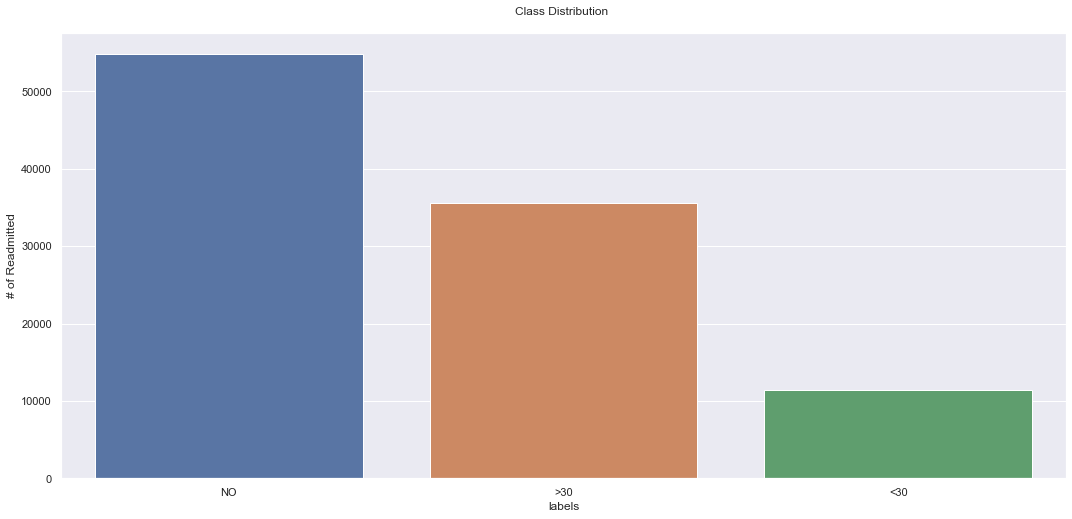

In [404]:
ax = sns.barplot(x=df['readmitted'].value_counts().index,   y=df['readmitted'].value_counts())
plt.xlabel('labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Class Distribution \n', size = 12)
plt.show()

- As Approximately 50% of the data belongs to the  "NO" class, and other classes have less labels.
- It will create class imbalance problem. So we will take this problem as 2 class problem.
- We will only try to predict if the patinet will readmitted or Not, We will skip the part of less than 30 days or greater than 30 days.

<b> Create 2 Class Label : </b> Created Another label to map <30 and >30 to 1 class for better Analysis and Classification.

In [405]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [406]:
# Created another column and take it as 2 class problem, Label the <30 and >30 as YES and Other "N0" as No.

def check_label(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'
    
df['readmitted_2'] =df['readmitted'].apply(check_label) 

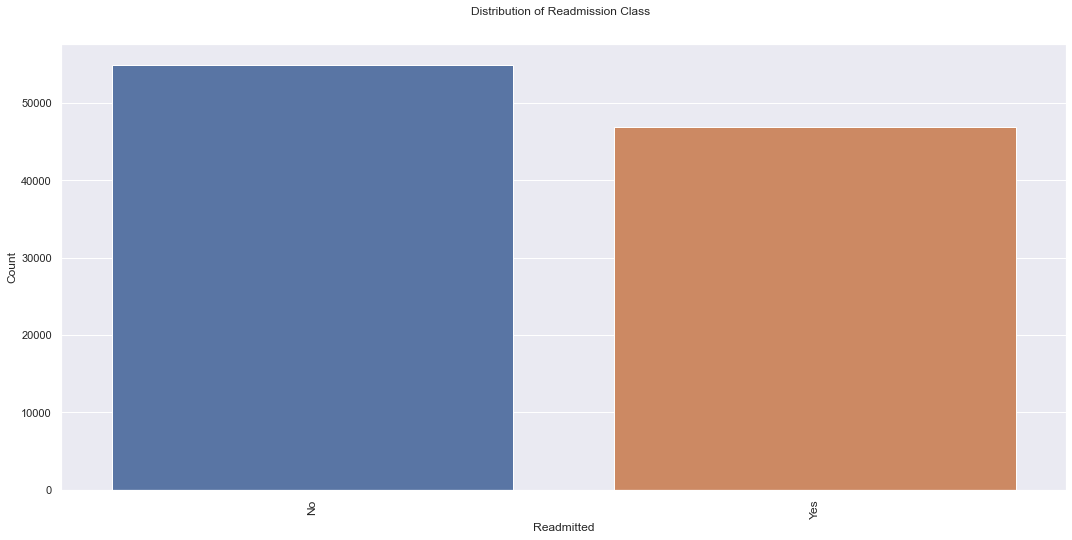

In [407]:
ax = sns.countplot(x='readmitted_2',   data= df)
plt.xlabel('Readmitted', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Readmission Class  \n\n', size = 12)
plt.show()

<b> Race Column</b>

Race featrure defines the race of the patient.
According to dataset values for race can be: 

- Caucasian 
- Asian
- African American  
- Hispanic
- other

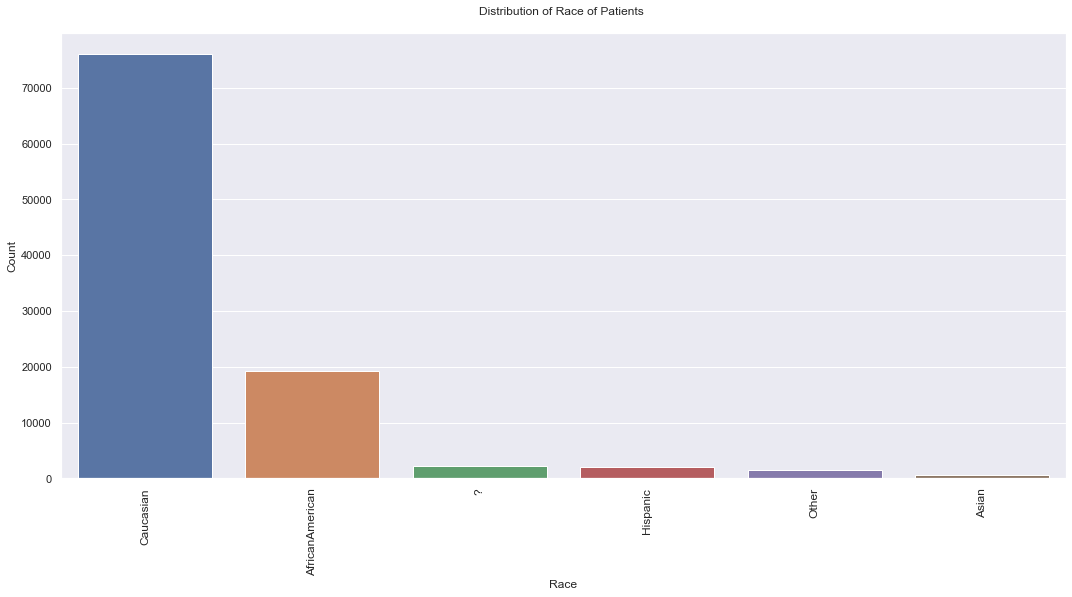

In [408]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

- The majority of the people are Caucasian, which are the people with european ancestry.

- There are "?" in the data which means the race contains the Null values.
- We will be needing to remove this from the data or we can also assign this with "Other" category.

In [409]:
df.loc[df['race'] == '?', 'race'] = 'Other'

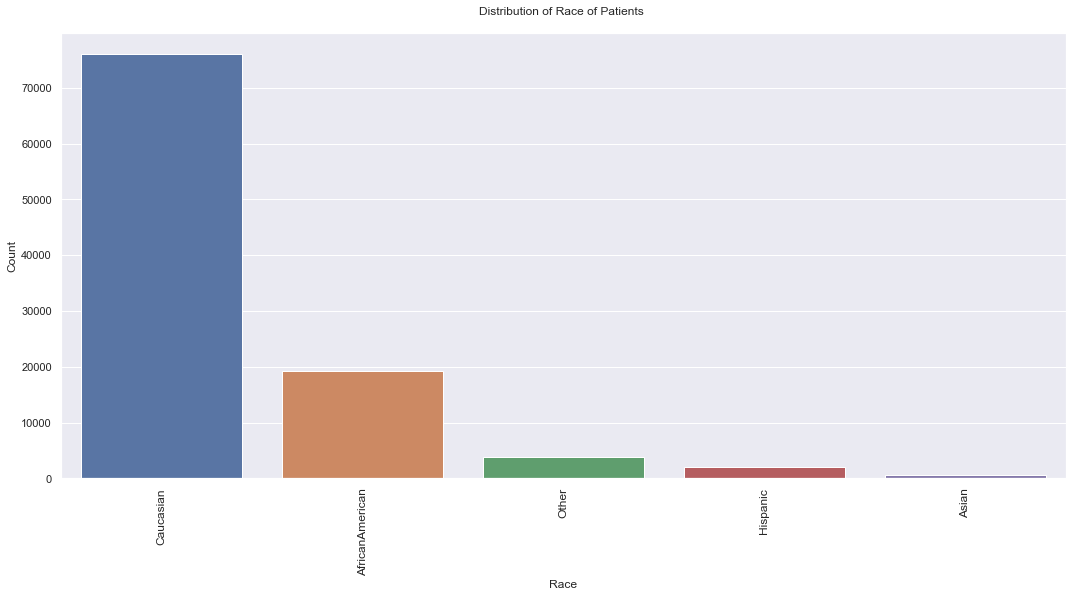

In [410]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

We replaced the Race containing value '?' with Other!

<b> What is the Gender Distribution in Data?</b>

According to Documentation, The values can be,

- male, 
- female  
- unknown/invalid

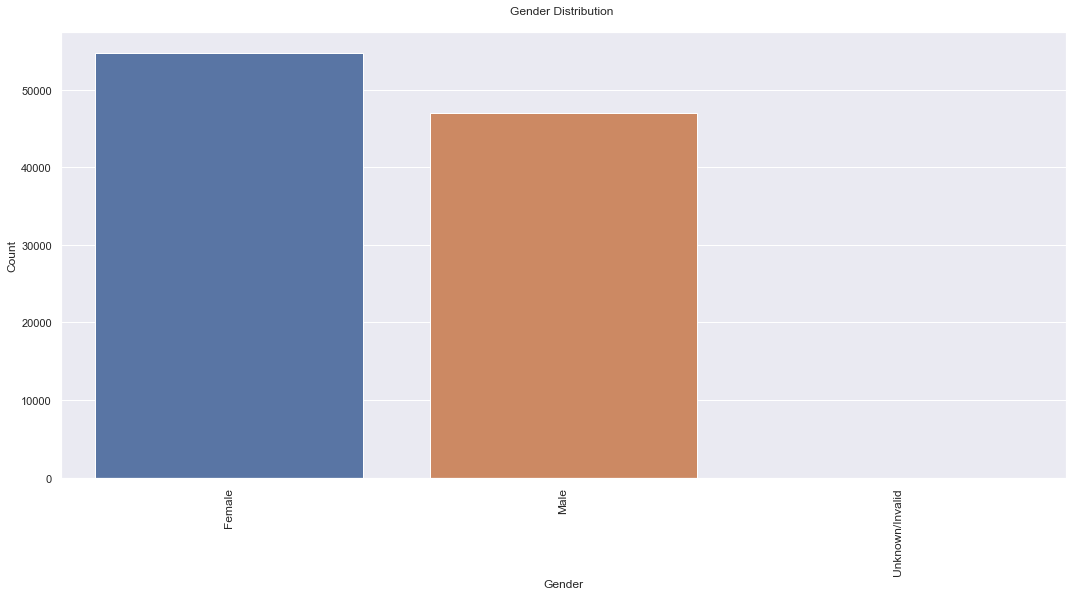

In [411]:
ax = sns.countplot(x='gender',   data= df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender Distribution \n', size = 12)
plt.show()

- We can see in the above figure that there are More than 50,000 Males in the data.
- Females are close to 48,000.
- There are some people whose gender is unknow, we can drop these rows as they are very few.

In [412]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

- There are only 3 Encounter for which we dont know the gender, It may create distribution error in the data. 
- So it is better to drop these rows from the data


In [413]:
df[df['gender']!='Unknown/Invalid']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,Yes
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,No
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,No
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,No


In [414]:
# Drop the "Unknown/Invalid" gender of the data.
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace = True)

In [415]:
df.reset_index(inplace = True, drop = True)

In [416]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No


<b>Relationship of Gender and Readmitted Overall</b>

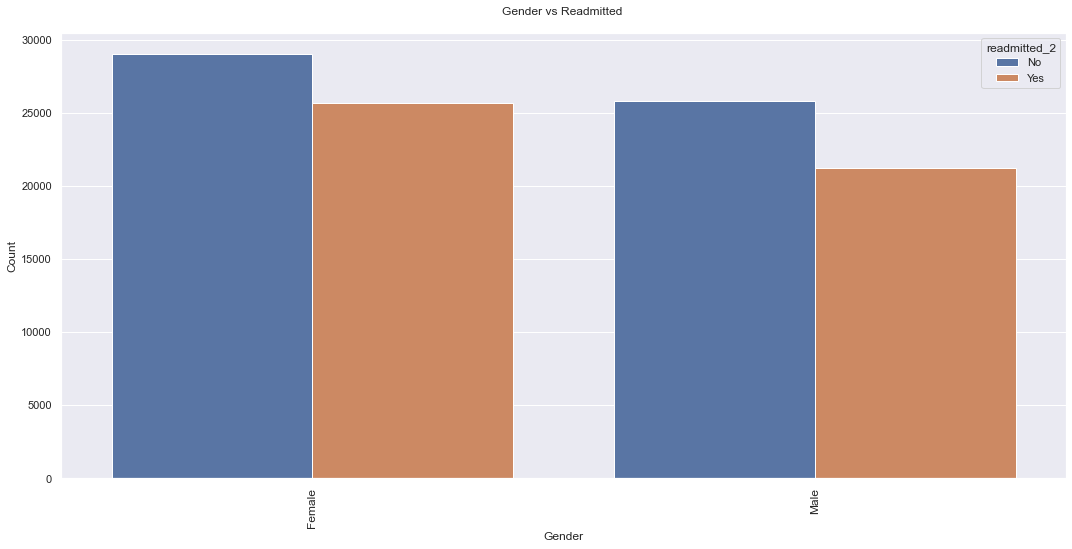

In [417]:
ax = sns.countplot(x="gender", hue="readmitted_2", data=df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender vs Readmitted \n', size = 12)
plt.show()

<b>What Age of People are there in data?</b>

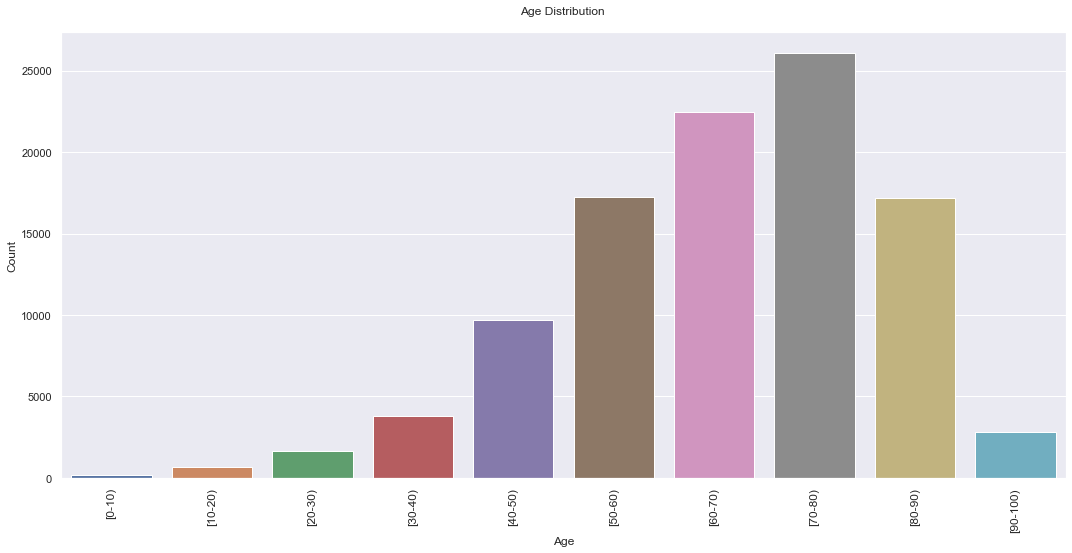

In [418]:
ax = sns.countplot(x='age',   data= df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age Distribution \n', size = 12)
plt.show()

- As per the Literature, The problem of Readmission is common in Older People. 

<b>RelationShip Between and Age and Readmission ? </b>

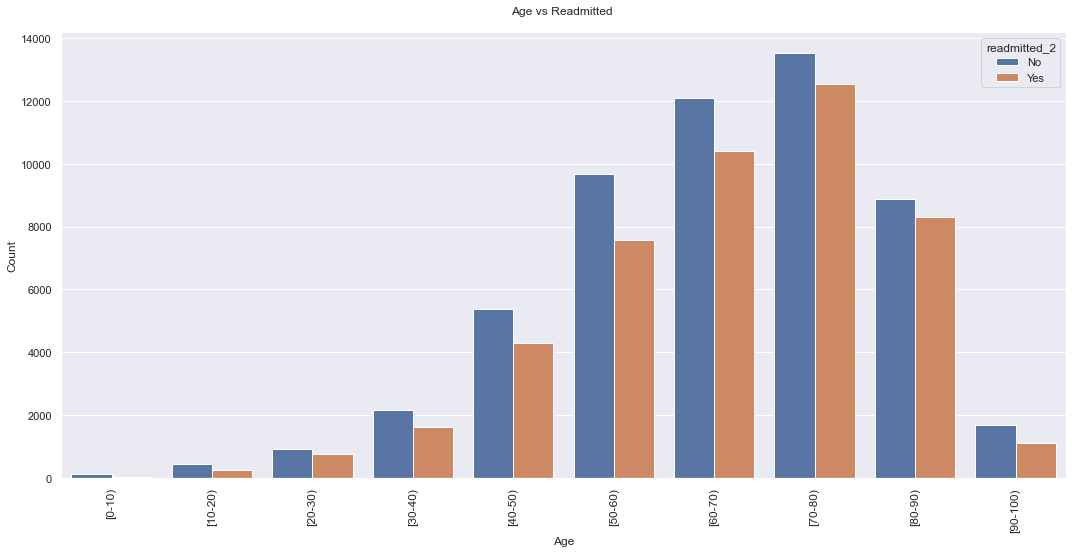

In [419]:
ax = sns.countplot(x="age", hue="readmitted_2", data=df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age vs Readmitted \n', size = 12)
plt.show()

- As we mentioned above, The relationship of older Patients and Readmission is Strong as Mostly Older Patients are at high risk of Readmission.

- And you can also see from the data the Mostly Older Patient are Readmitted, and younger people not tend to readmit. 

<b> Lets Analyze Weight of the Patient ?</b>

In [420]:
df.shape

(101763, 51)

In [421]:
df['weight'].value_counts()

?            98566
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

- From value Counts We can see that the from around 101000 records, 98569 records dont have Weight Value. 
- So, We will drop this column. 
- If we will try to fill this column it can disturb the distribution of the data.

In [422]:
# Lets drop this column. 
df.drop(columns = ['weight'], inplace = True)

<b>What is the Discharge Disposition ?</b>

AS per the Documentation, Integer identifier corresponding to 29 distinct values, for example:
- discharged to home
- expired
- not available 

As per Literature, The Discharge Disposition means the facility to which patinet is discharged to. Patient can discharge to Home Health, etc. 

In [423]:
len(df['discharge_disposition_id'].unique())

26

There are 26 Discharge Disposition's in the data and we also dont have mapping for it.

<b>What is Admission Source ID? </b>


As per the Literature, Integer identifier corresponding to 21 distinct values, for example:
- physician referral,
- emergency room,  
- transfer from a hospital

Admission Source means, from which source the patient came? The Patient can come from Physician Referral and other Sources.

In [424]:
df['admission_source_id'].unique()  

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [425]:
print('There are', len(df['admission_source_id'].unique()), 'unique Admission Sources from which patient can be admitted.')

There are 17 unique Admission Sources from which patient can be admitted.


<b>What is meaning of time_in_hospital? </b>


As per Literaure, it is Integer number of days between admission and discharge.

In [426]:
df['time_in_hospital'].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14],
      dtype=int64)

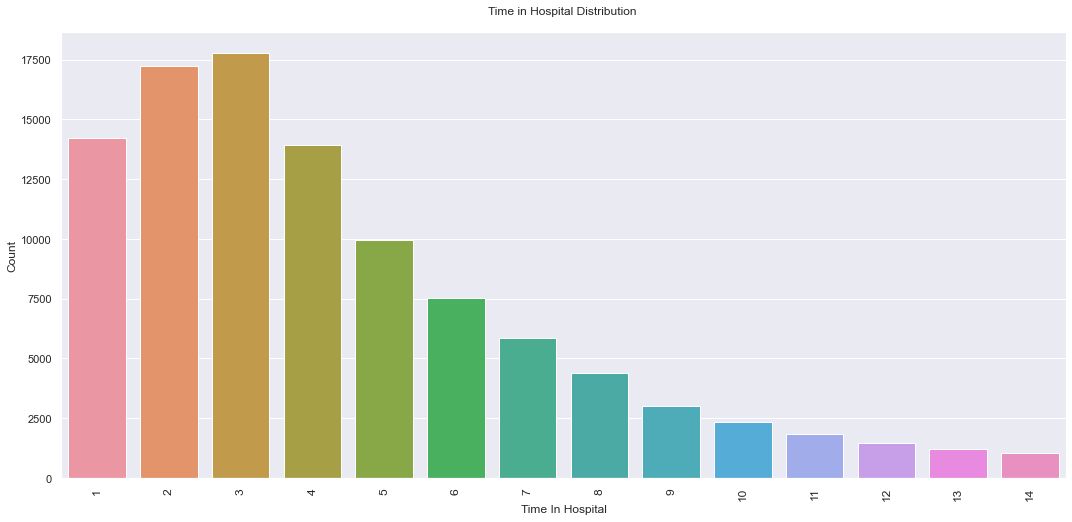

In [427]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',   data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Time in Hospital Distribution \n', size = 12)
plt.show()

In [428]:
df['time_in_hospital'].mean()

4.396018199149003

From the Graph and Mean of the Time in Hospital, We found that the majority of the people stays in hospital 3-4 Days.

<b>What is the Relation of Stay in Hospital and Readmission? </b>

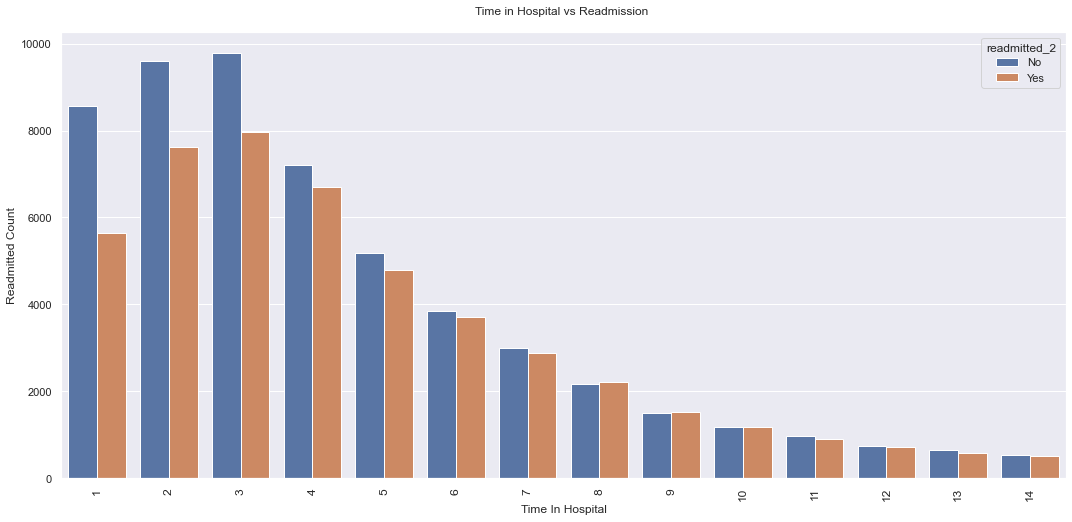

In [429]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',  hue= 'readmitted_2',  data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Time in Hospital vs Readmission \n', size = 12)
plt.show()

<b>What is the relation of Number of Procedures and Readmission? </b>

Number of procedures (other than lab tests) performed during the encounter

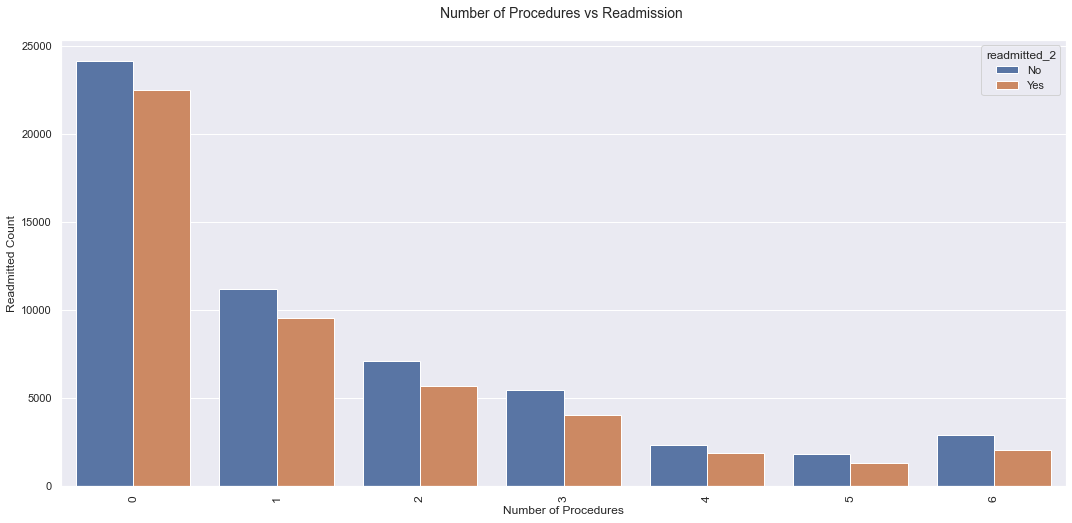

In [430]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='num_procedures',  hue= 'readmitted_2',  data= df)
plt.xlabel('Number of Procedures', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Number of Procedures vs Readmission \n', size = 14)
plt.show()

- Number of Procedures is also not giving some vital signs of readmission with increase in procedure. 
- Majority of patients have 0 procedures which are can be Readmitted and not Readmitted

<b> Lets Analyze Distribution of each value in these columns! </b>

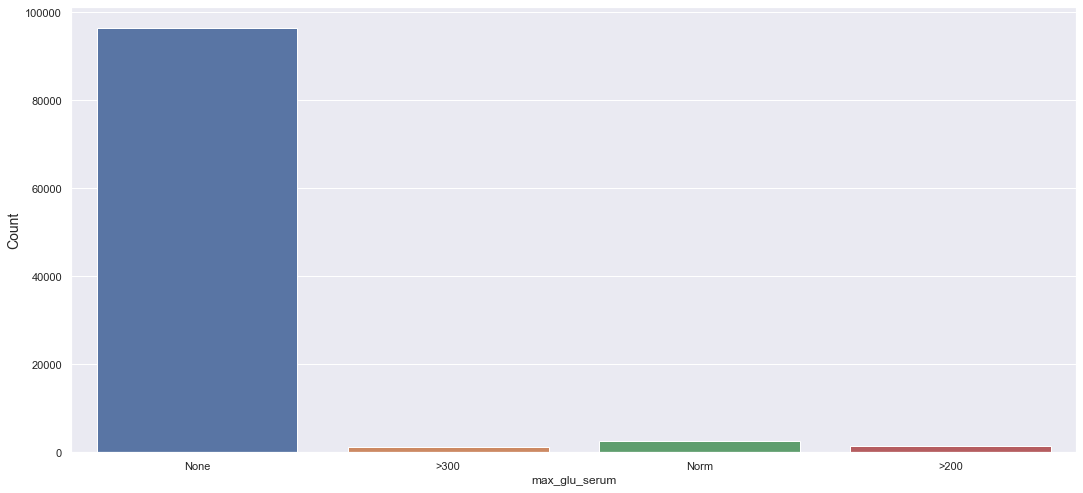

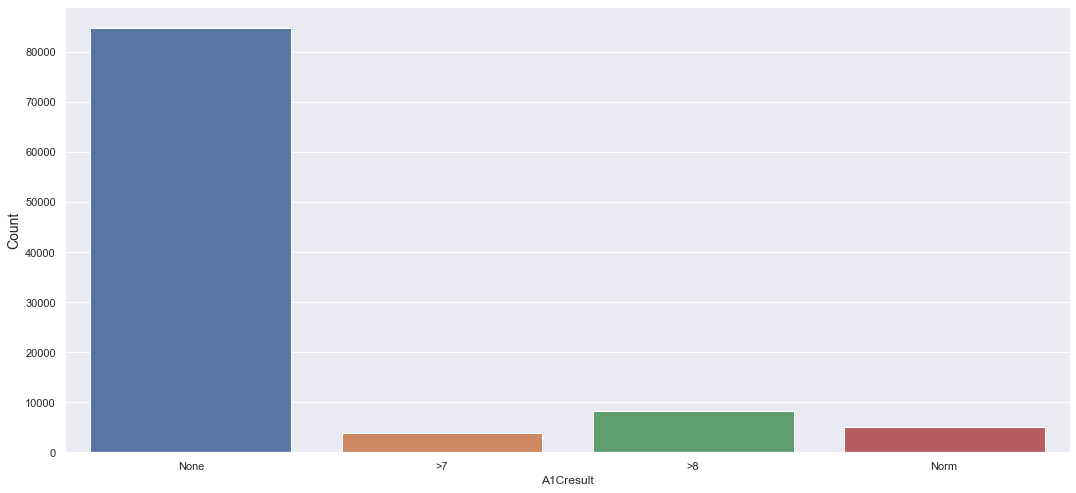

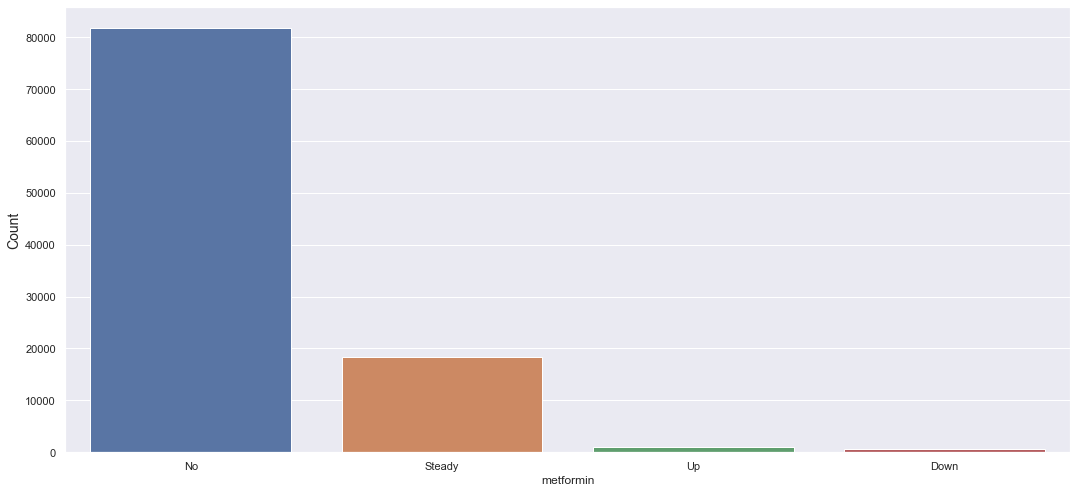

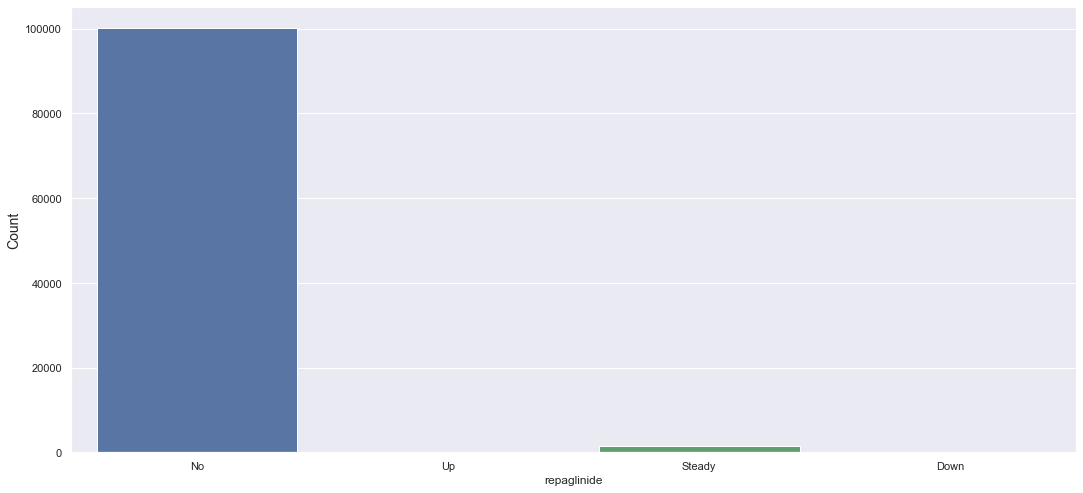

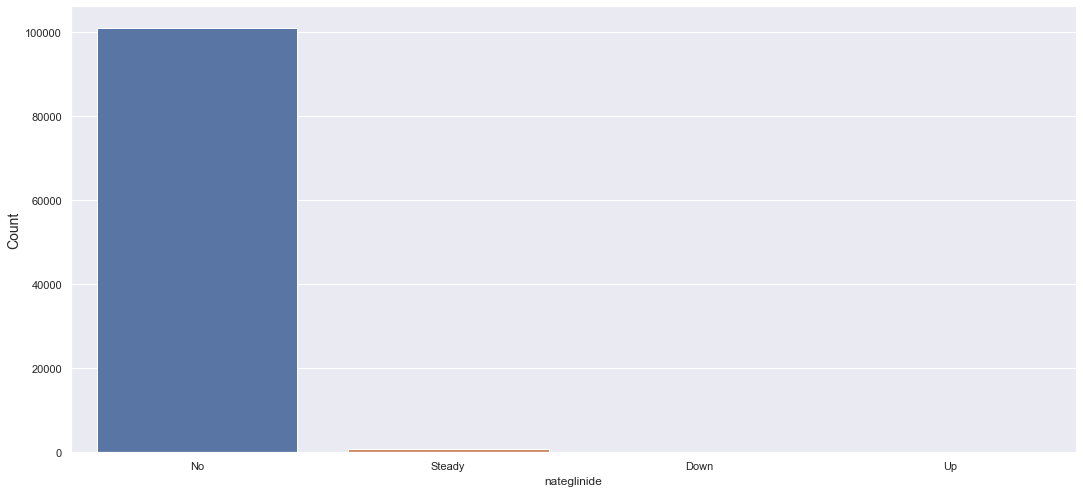

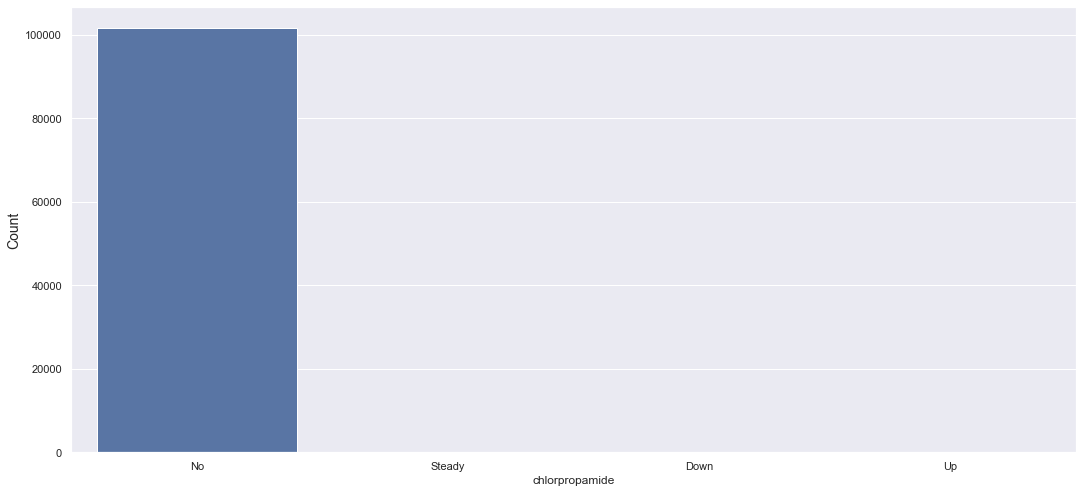

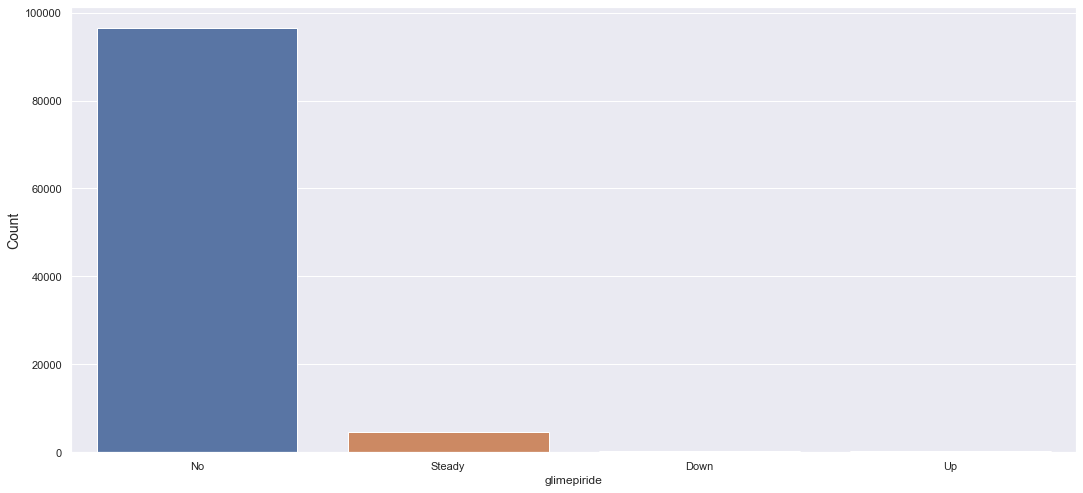

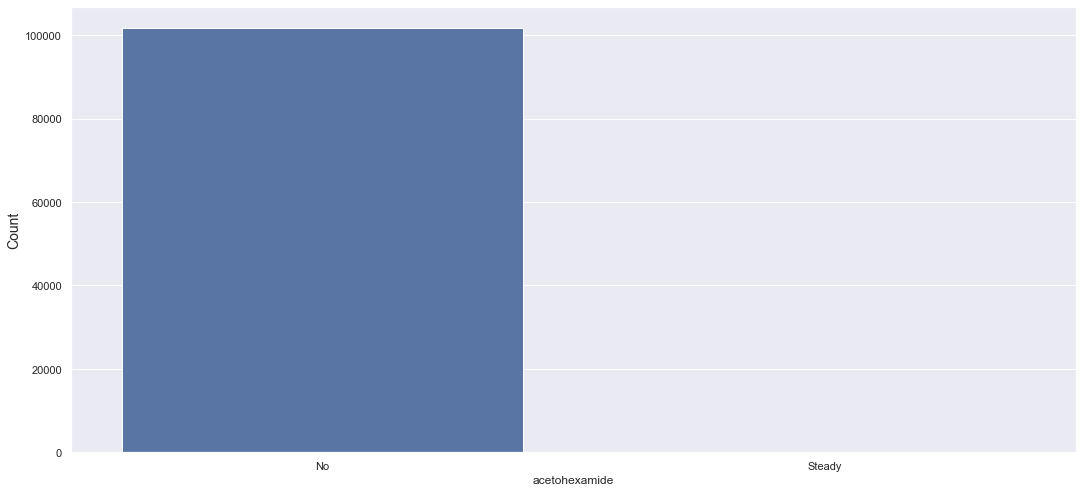

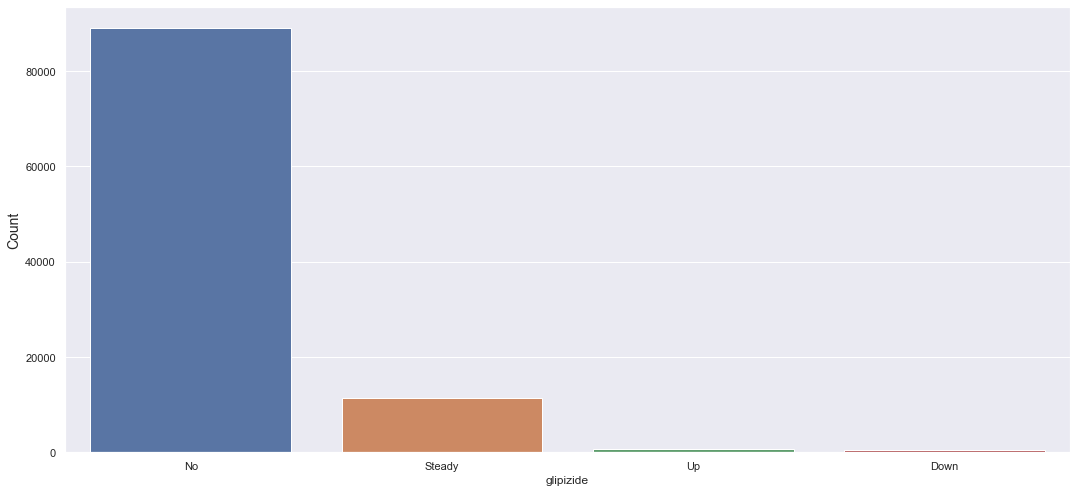

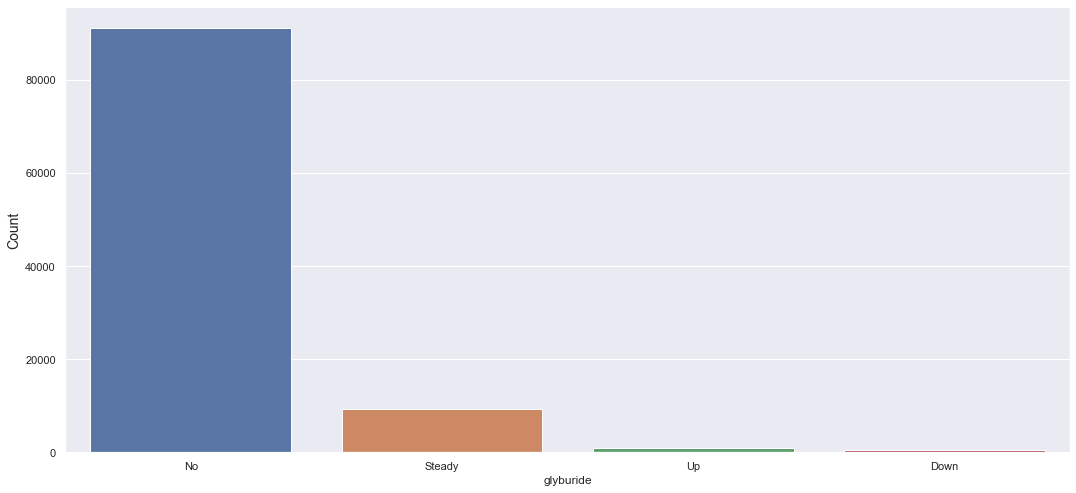

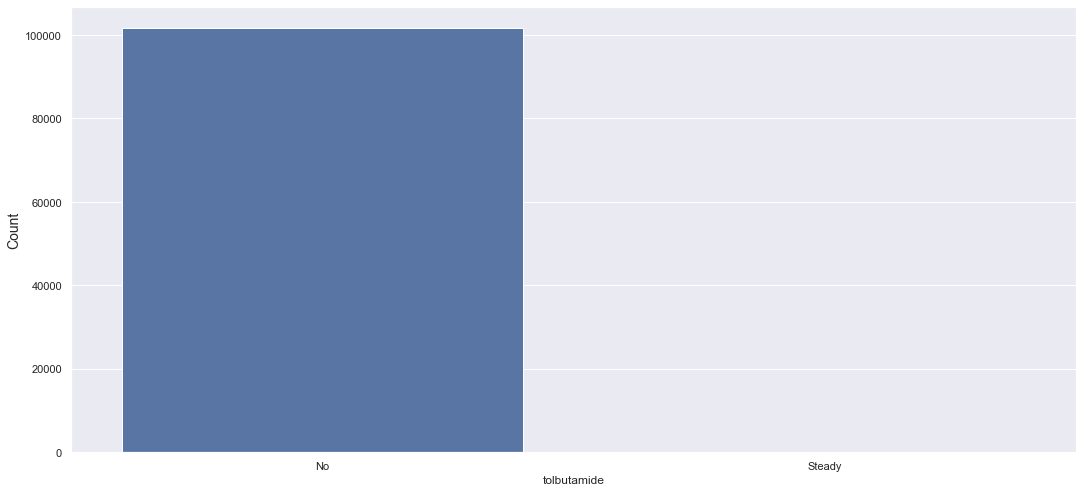

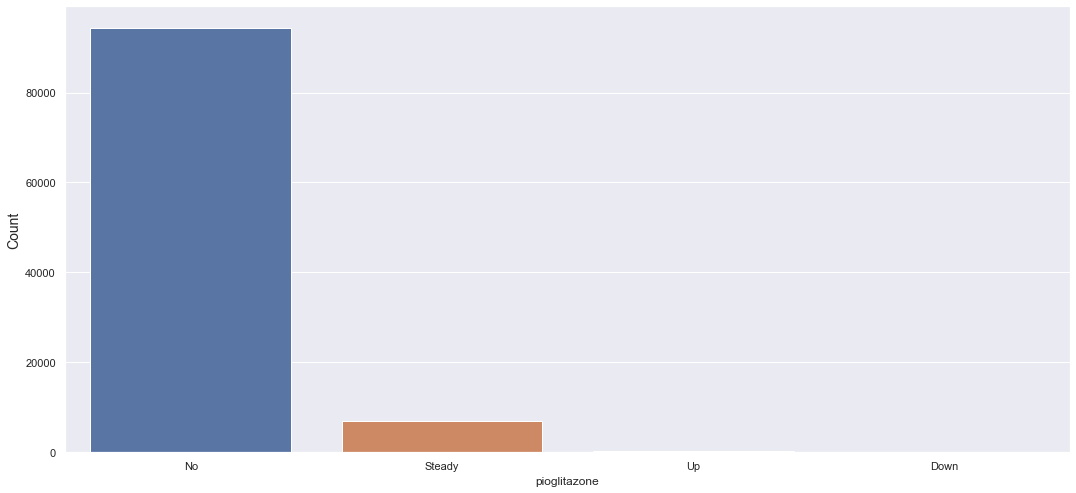

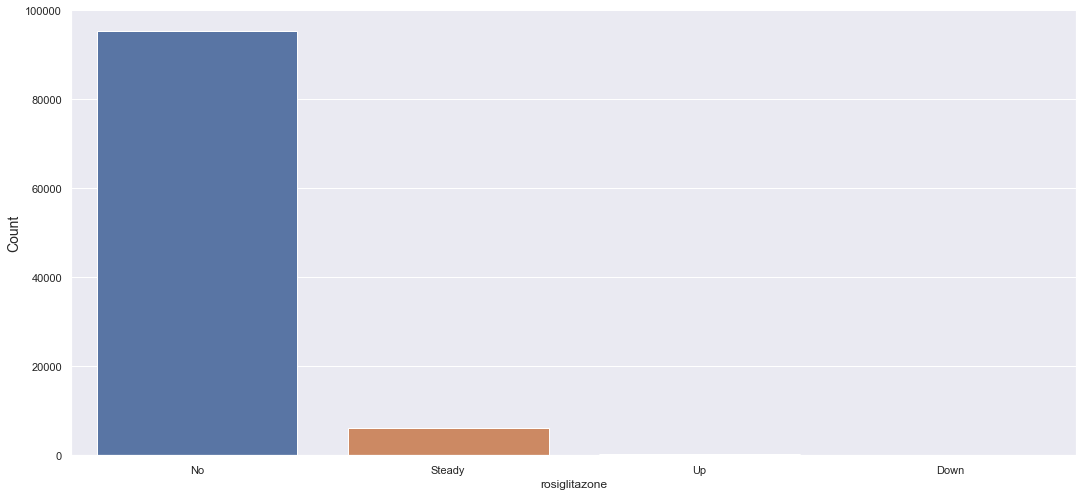

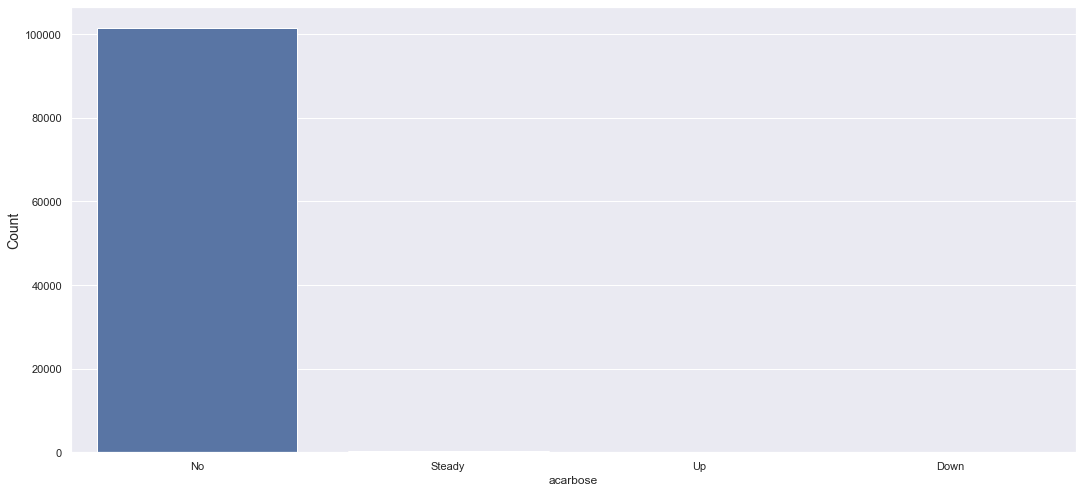

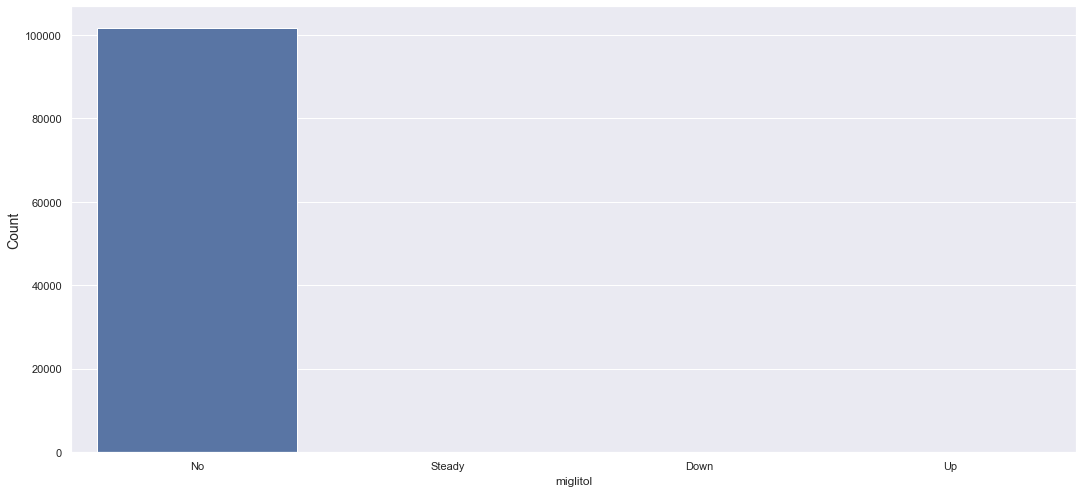

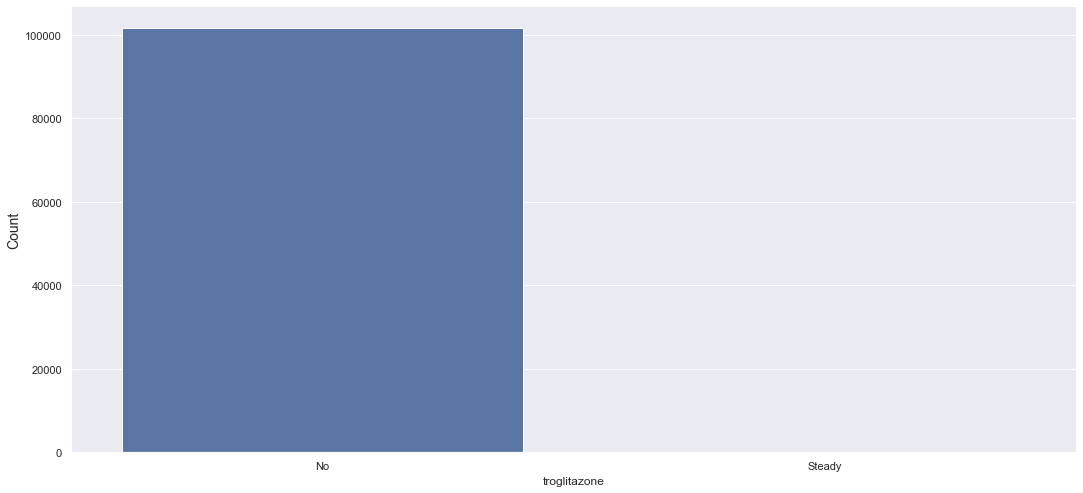

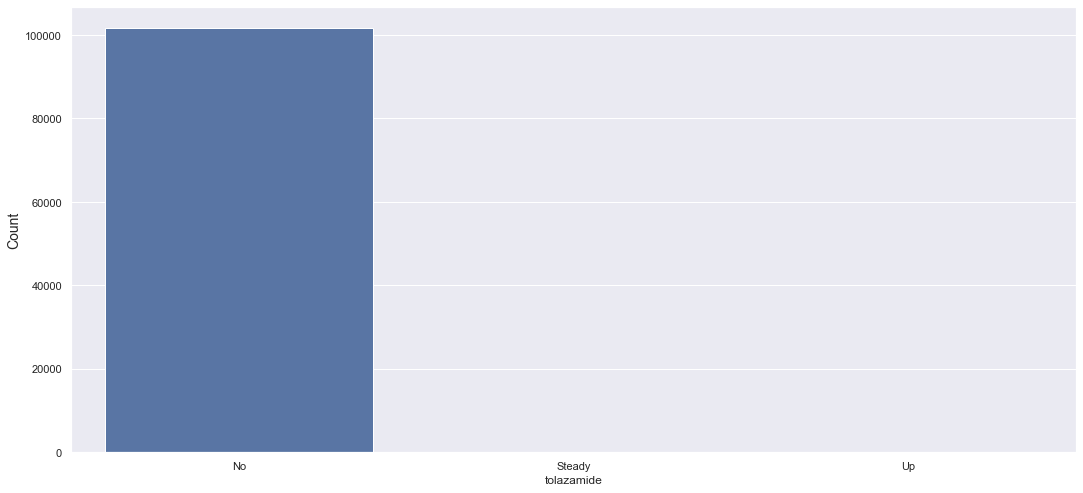

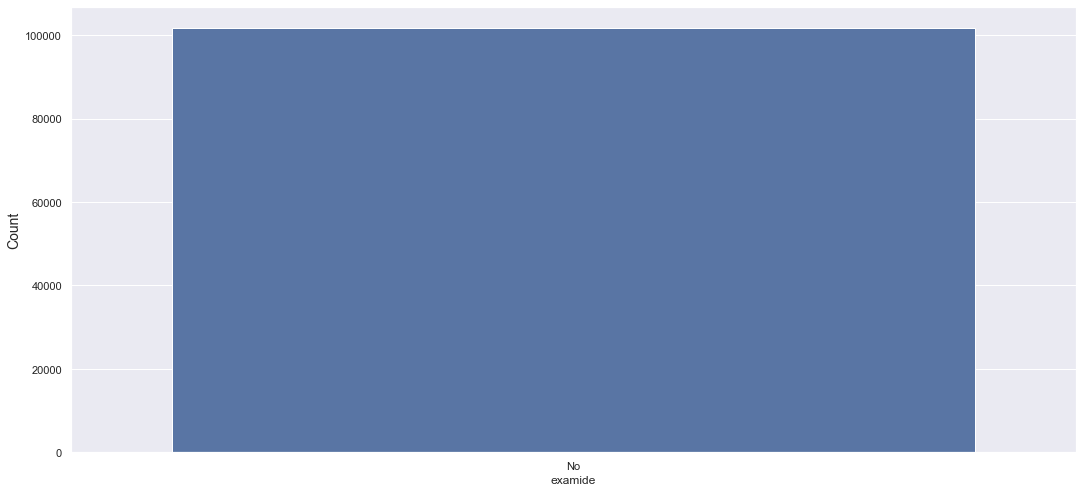

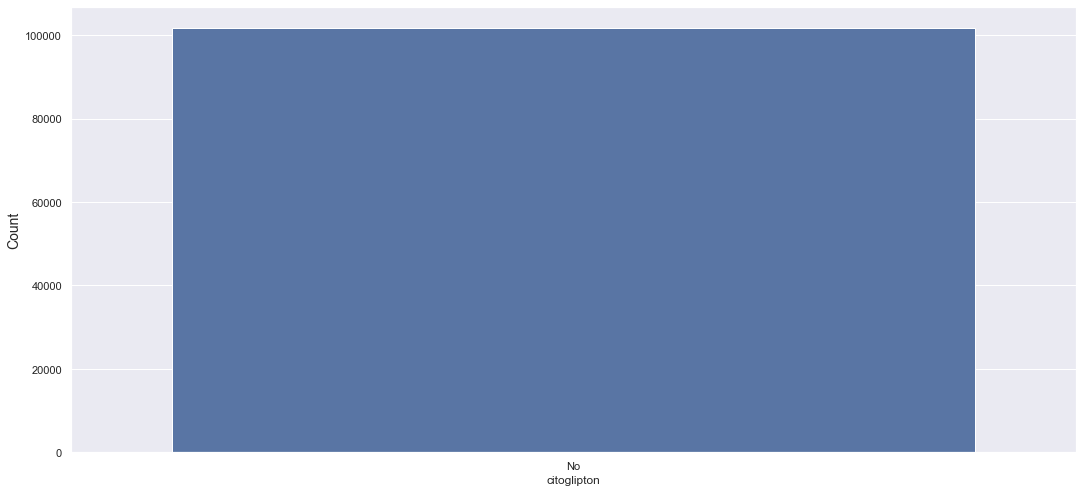

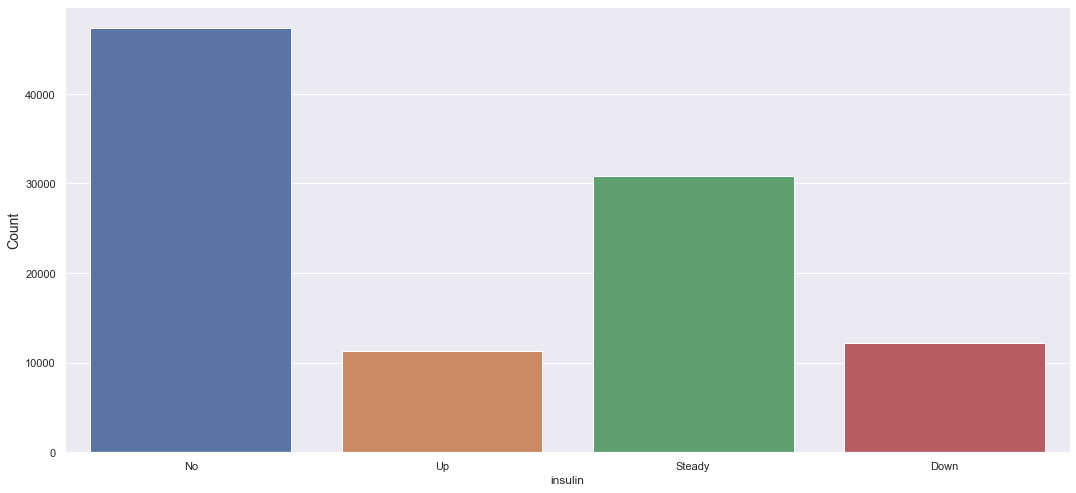

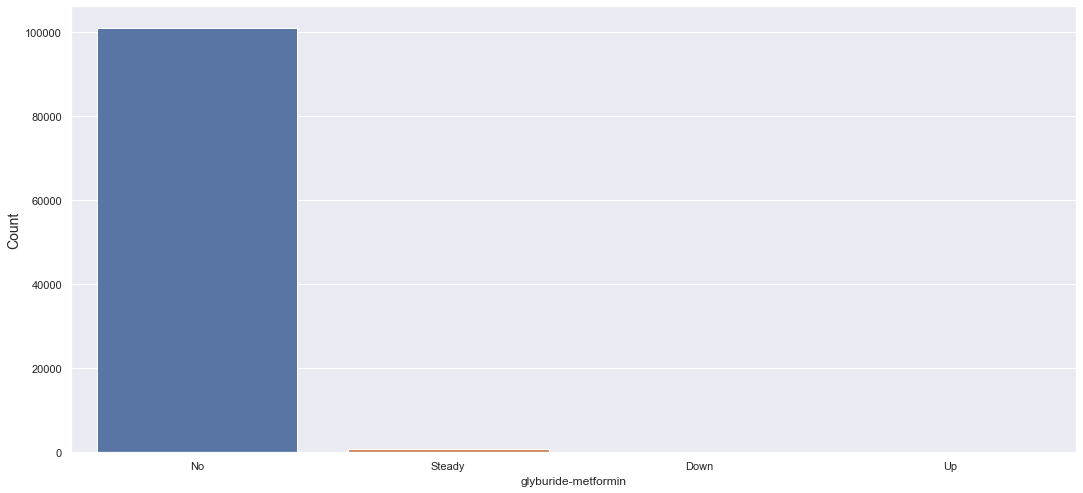

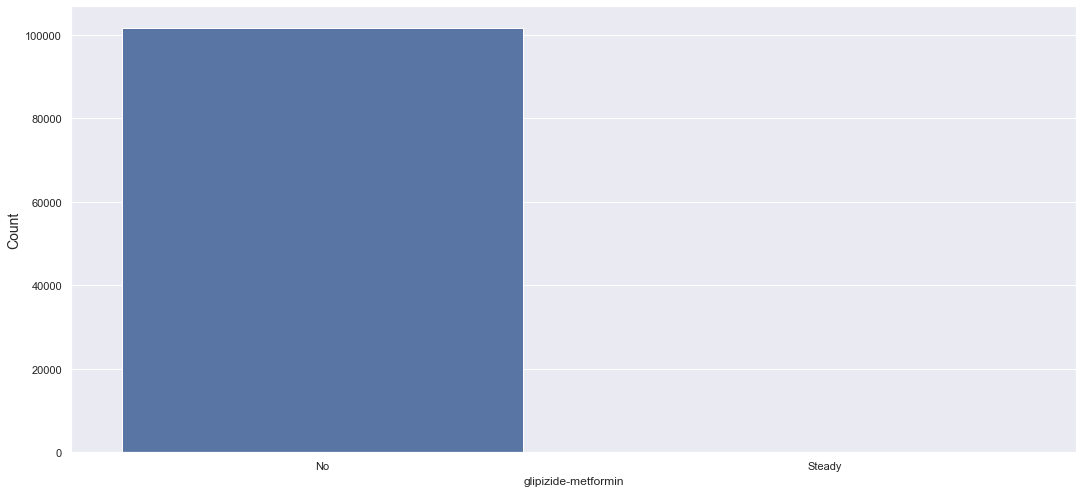

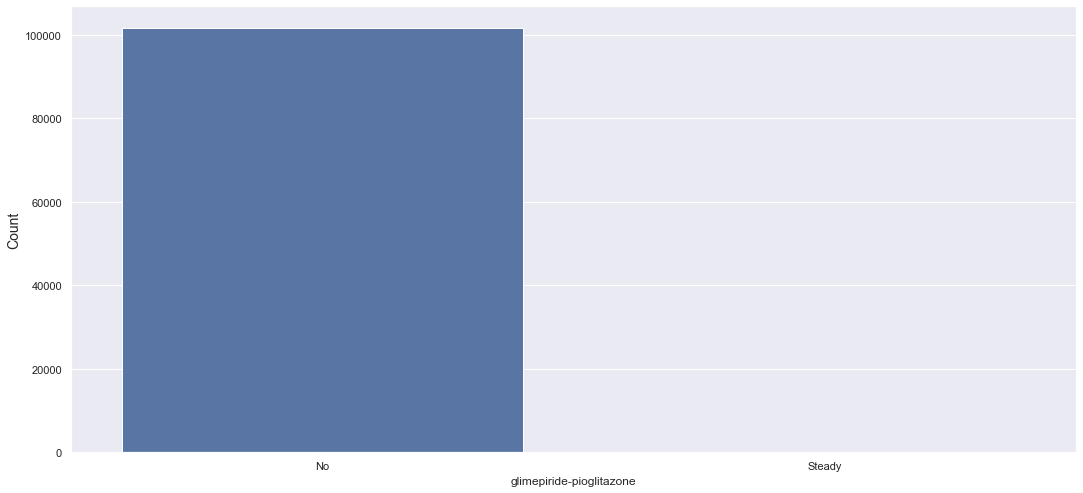

In [431]:
for i in df.iloc[:, 21:44].columns:

    ax = sns.countplot(x=i, data= df)
#     plt.xticks(rotation=90, size = 12)
    plt.ylabel('Count', size = 14)
    plt.show()

- From the above count plots, we can see that majority of the Medicines are not assigned to patients.
- If one is assigned then it is assigned to very few people.

<b> Analyze Medicines with Class Variable Readmission </b>

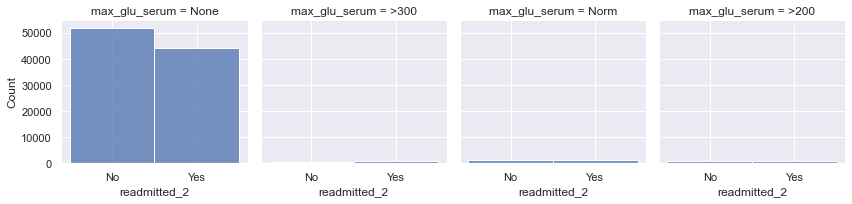

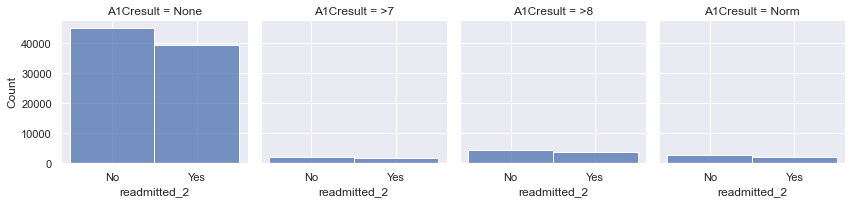

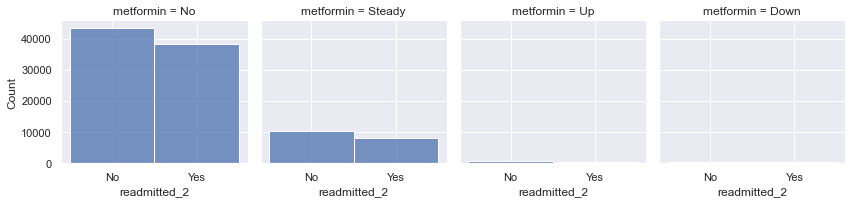

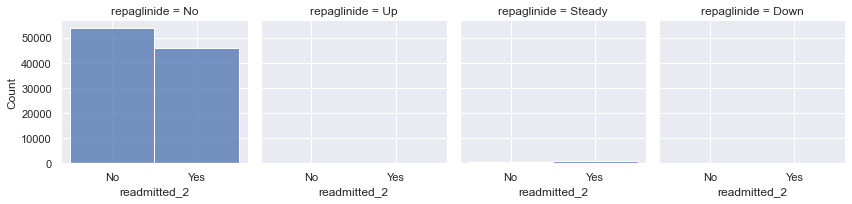

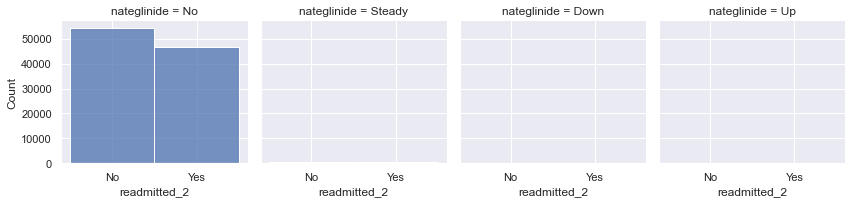

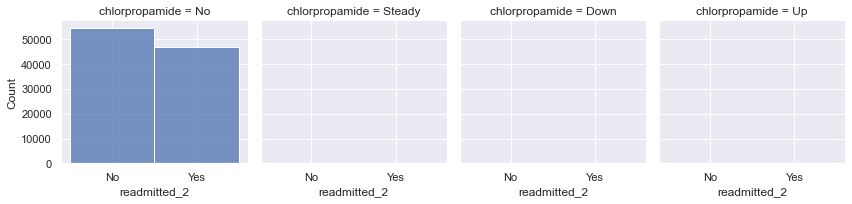

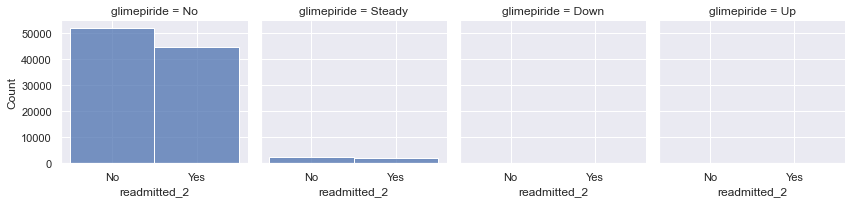

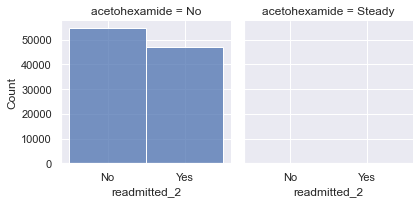

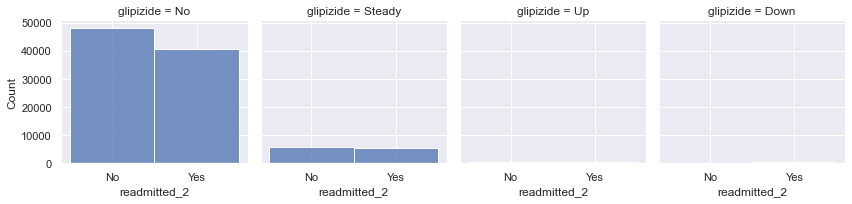

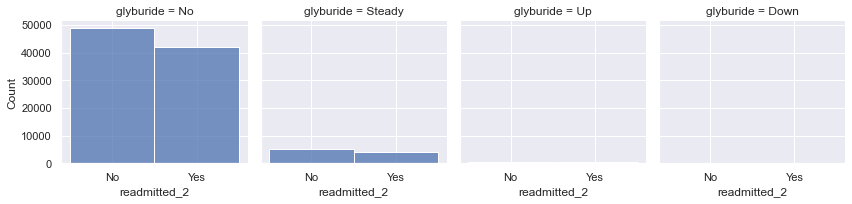

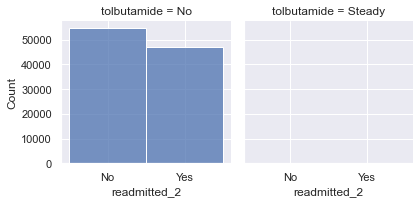

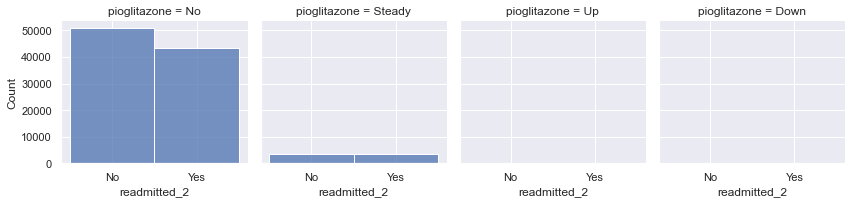

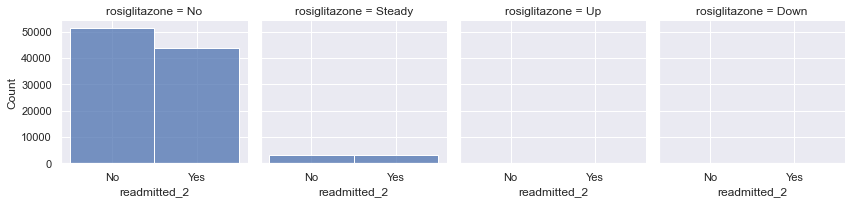

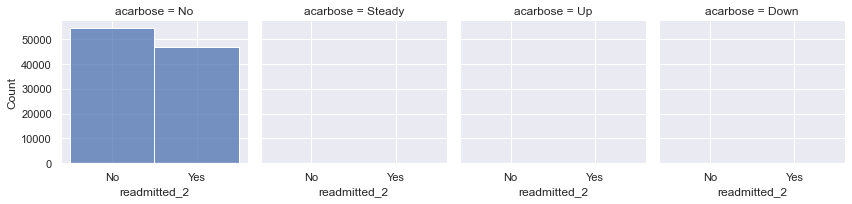

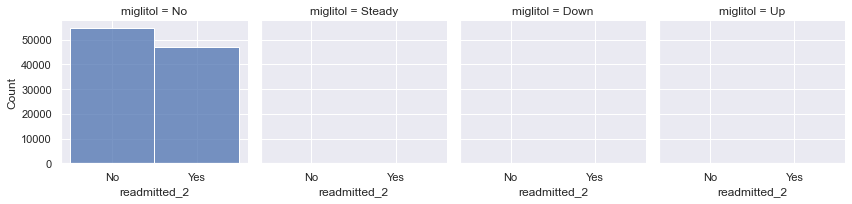

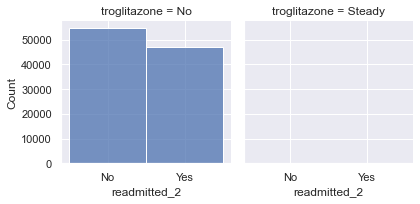

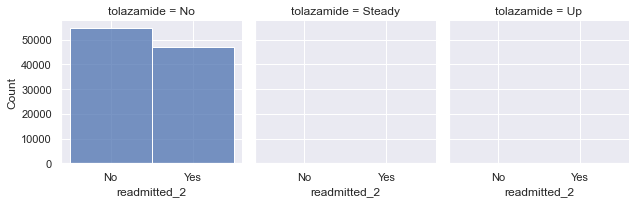

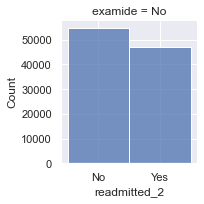

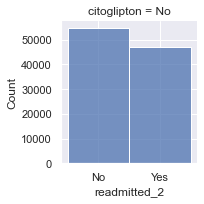

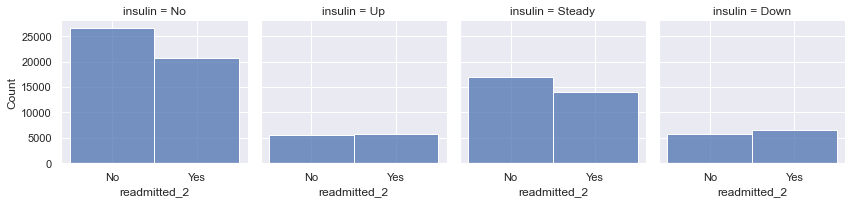

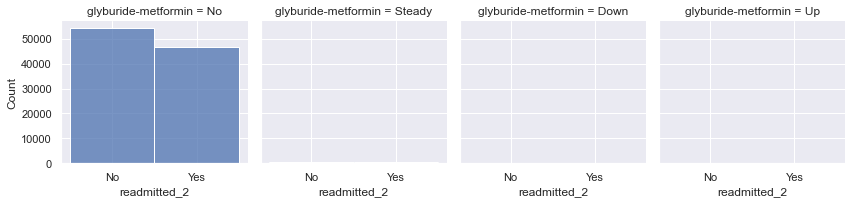

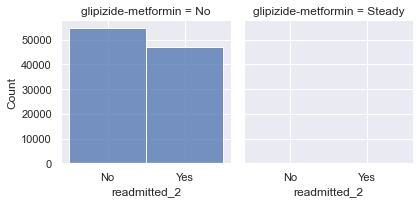

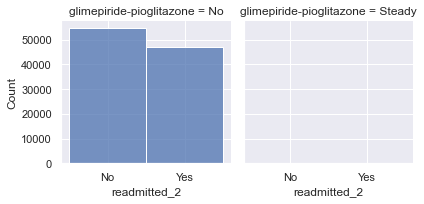

In [432]:
for columnName in df.iloc[:, 21:44].columns:
    g = sns.FacetGrid(df, col=columnName)
    g.map(sns.histplot, "readmitted_2")
    plt.show()